# Students Do: Preventing credit card defaults with neural networks

In this activity, you will train a neural network model to predict whether a credit card holder will default in the next month.

The dataset provided contains `30,000` anonymous records of credit default status with `23` features columns and one binary target column entitled _DEFAULT_, where `1` represents a defaulted credit card.

The `23` features include demographic info (age, gender, marital status, etc.), credit limit, past payment details, and other relevant information.

You are tasked to create a neural network model to predict if a credit card holder will default.

In [1]:
# Initial imports
import pandas as pd
from path import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(126)

## Instructions

1. Load the data in a Pandas DataFrame.

In [3]:
# Read in data
file_path = Path("../Resources/cc_default.csv")
df = pd.read_csv(file_path)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


2. Define the features set `X` by including all the columns of the DataFrame except the `DEFAULT` column.

In [4]:
# Define features data
X = df.copy()
X = X.drop(columns=["DEFAULT"])
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


3. Create the target vector `y` by assigning the values of the `DEFAULT` column of the DataFrame.

In [5]:
# Define target data
y = df["DEFAULT"].values
y = y.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

4. Create the training an testing sets using the `train_test_split` function from `sklearn`.

In [6]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

5. Scale the features data using the `StandardScaler` from `sklearn`.

In [7]:
# Create the scaler instance
X_scaler = StandardScaler()

In [8]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [9]:
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

6. Create a neural network model with `23` inputs, one hidden layer with `69` units, and an output layer with a single output. Use the `relu` activation function for the first layer and `sigmoid` for the second layer.

In [10]:
# Define the model
number_inputs = 23
number_hidden_nodes = 69

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))

7. Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and `accuracy` as additional metric.

In [11]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

8. Fit the model with `100` epochs.

In [12]:
# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4745 - accuracy: 0.8060: 0s - loss: 0.4833 - accuracy
Epoch 2/100
704/704 [==============================] - 1s 850us/step - loss: 0.4498 - accuracy: 0.8145
Epoch 3/100
704/704 [==============================] - 1s 739us/step - loss: 0.4438 - accuracy: 0.8168
Epoch 4/100
704/704 [==============================] - 1s 735us/step - loss: 0.4405 - accuracy: 0.8182
Epoch 5/100
704/704 [==============================] - 1s 751us/step - loss: 0.4388 - accuracy: 0.8180
Epoch 6/100
704/704 [==============================] - 1s 756us/step - loss: 0.4363 - accuracy: 0.8182
Epoch 7/100
704/704 [==============================] - 0s 638us/step - loss: 0.4357 - accuracy: 0.8193
Epoch 8/100
704/704 [==============================] - 0s 623us/step - loss: 0.4337 - accuracy: 0.8184
Epoch 9/100
704/704 [==============================] - 0s 657us/step - loss: 0.4330 - accuracy: 0.81940s - loss: 0.4346 - accuracy: 
Epoch 10/100
70

9. Plot the loss function and accuracy.

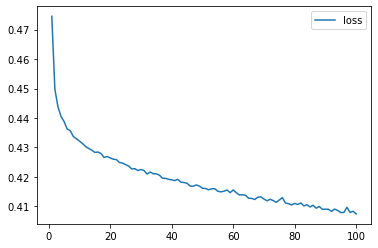

In [13]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

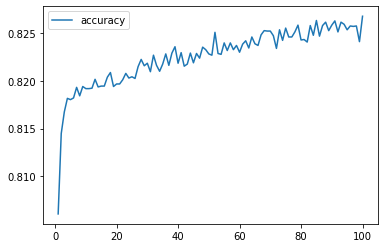

In [14]:
# Plot the accuracy
df_plot.plot(y="accuracy")


10. Evaluate the model using testing data and the `evaluate` method.

In [15]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 0s - loss: 0.4419 - accuracy: 0.8179
Loss: 0.4418887794017792, Accuracy: 0.8178666830062866


## Challenge

For this challenge section, you have to figure out how the model you created could be modified to improve the accuracy.

1. Review the Keras documentation about activation functions, and decide if there is anyone that could be used instead of `sigmoid`.

2. Change any other parameter that you believe could improve the model's accuracy.

3. Evaluate the model's accuracy and loss and write down your conclusions.

In [16]:
# Define the model
number_inputs = 23
number_hidden_nodes = 120

nn_2 = Sequential()
nn_2.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn_2.add(Dense(units=1, activation="hard_sigmoid"))

In [17]:
# Compile model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Fit the model
model_2 = nn_2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
704/704 [==============================] - 0s 702us/step - loss: 0.5183 - accuracy: 0.7855
Epoch 2/100
704/704 [==============================] - 1s 723us/step - loss: 0.4866 - accuracy: 0.7912
Epoch 3/100
704/704 [==============================] - 1s 713us/step - loss: 0.4812 - accuracy: 0.7955
Epoch 4/100
704/704 [==============================] - 1s 752us/step - loss: 0.4614 - accuracy: 0.8044
Epoch 5/100
704/704 [==============================] - 1s 718us/step - loss: 0.4571 - accuracy: 0.8058
Epoch 6/100
704/704 [==============================] - 1s 719us/step - loss: 0.4710 - accuracy: 0.8028
Epoch 7/100
704/704 [==============================] - 1s 727us/step - loss: 0.4572 - accuracy: 0.8056
Epoch 8/100
704/704 [==============================] - 1s 755us/step - loss: 0.4559 - accuracy: 0.8060
Epoch 9/100
704/704 [==============================] - 1s 728us/step - loss: 0.4700 - accuracy: 0.8078
Epoch 10/100
704/704 [==============================] - 1s 775us/step - l

In [19]:
# Evaluate the model fit with linear dummy data
model_loss_2, model_accuracy_2 = nn_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss_2}, Accuracy: {model_accuracy_2}")

235/235 - 0s - loss: 0.5120 - accuracy: 0.8221
Loss: 0.511991560459137, Accuracy: 0.8221333622932434


### Conclusions

**Sample Answer:** After reviewing the activation functions documentation, I decided to use the `tanh` function for the first layer and the `hard_sigmoid` for the output layer. There is an slightly improvement in the model's accuracy that is worth to take this activation functions as a better option.

We may test with different functions or even perform PCA as part of the possible optimizations.